In [11]:
#Importamos bibliotecas
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual


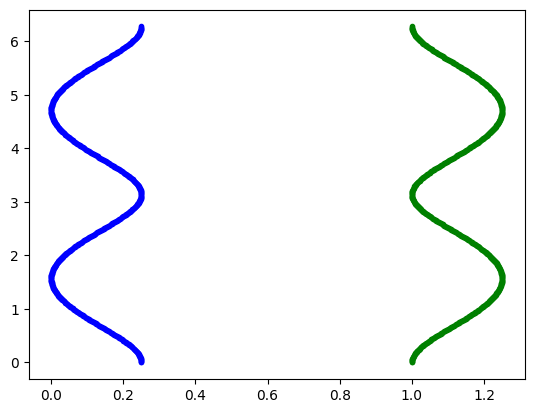

In [28]:
#Definimos las variables
a1 = 0.5
a0 = 1

theta = np.arange(0, (2 * np.pi), 0.01)
def calculate_omega(a0,a1,theta):
    discriminant = 1-4*(a0**2) * a1**2 /(a0**2+a1**2)**2 * (np.cos(theta))**2
    # discriminant = 1-4 * a1**2 /(a0**2+a1**2)**2 * (np.cos(theta))**2
    wf = 1/2 * (a0**2 + a1**2)*(1 + np.sqrt(discriminant))
    ws =  1/2 * (a0**2 + a1**2)*(1 - np.sqrt(discriminant))
    return wf, ws

# plt.axes(projection = 'polar') 



def graph(theta):
    wf, ws = calculate_omega(a0,a1,theta)
    plt.plot(wf,theta, 'g.')
    plt.plot(ws,theta, 'b.')
    
        
def graph_xy(theta):
    wf, ws = calculate_omega(a0,a1,theta)

    plt.plot(wf,theta, 'g.')
    plt.plot(ws,theta, 'b.')


graph(theta)

In [13]:
#Definimos las variables
a1 = 2  
a0 = 6
gamma = 5/3
Beta = (2*a0**2) / (gamma * a1*2)



theta = np.linspace(0, 2 * np.pi, 1000)


w_k_squaredA= a1*2 * np.cos(theta)*2
w_k_squaredR = (1/2) * a1**2 * ((Beta / 2) + 1) * (1 + np.sqrt(1 - (4 * Beta * np.cos(theta)**2) / (2 * (Beta + 1)**2)))
w_k_squaredL = (1/2) * a1**2 * ((Beta / 2) + 1) * (1 - np.sqrt(1 - (4 * Beta * np.cos(theta)**2) / (2 * (Beta + 1)**2)))

In [18]:
# Propongamos las ecuaciones
a0 = sp.Symbol("a0")
a1 = sp.Symbol("a1")

x = sp.Symbol("x")
z = sp.Symbol("z")
k = sp.Symbol("k")
theta = sp.Symbol("Theta")

k_para = k*sp.cos(theta)
k_perp = k*sp.sin(theta)


v = sp.Symbol("v") #Sabemos que v2 = w2/k2

#Definimos la ecuación

eq = v**2 - v*(a0**2+a1**2)*sp.cos(theta) +(a0*a1*sp.cos(theta))**4-((a0**2+a1**2+(a0**2-a1**2)*sp.cos(theta)*sp.sin(theta)*sp.sin(theta)*(sp.cos(theta)+sp.sin(theta)*(a0**2+a1**2))))

sol = sp.solve(eq,v)
sol

[(a0**2 + a1**2)*cos(Theta)/2 - sqrt(-4*a0**4*a1**4*cos(Theta)**4 + 4*a0**4*sin(Theta)**3*cos(Theta) + a0**4*cos(Theta)**2 + 2*a0**2*a1**2*cos(Theta)**2 + a0**2*(1 - cos(4*Theta))/2 + 4*a0**2 - 4*a1**4*sin(Theta)**3*cos(Theta) + a1**4*cos(Theta)**2 - a1**2*(1 - cos(4*Theta))/2 + 4*a1**2)/2,
 (a0**2 + a1**2)*cos(Theta)/2 + sqrt(-4*a0**4*a1**4*cos(Theta)**4 + 4*a0**4*sin(Theta)**3*cos(Theta) + a0**4*cos(Theta)**2 + 2*a0**2*a1**2*cos(Theta)**2 + a0**2*(1 - cos(4*Theta))/2 + 4*a0**2 - 4*a1**4*sin(Theta)**3*cos(Theta) + a1**4*cos(Theta)**2 - a1**2*(1 - cos(4*Theta))/2 + 4*a1**2)/2]

In [ ]:
eq1 = (v**2-(a1*k_para/k)**2) - ((a0**2+a1**2)*(k_perp*x+k_para*z)-(a1**2)*k_para*z)*k_perp/(k**2)
eq2 = ((v**2-(a1*k_para/k)**2)) - ((a0**2+a1**2)*(k_perp*x+k_para*z)-(a1**2)*k_para*z)*k_para/(k**2)-(a1**2)*k_para/(k**2)*(k_perp*x+k_para*z)

#Proponemos la matriz 2x2 para x y z

eq1_x = v**2 - (a1*k_para/k)**2 - ((a0**2+a1**2)*(k_perp*x+k_para*z)-(a1**2)*k_para*z)*k_perp/(k**2)

KeyError: 0

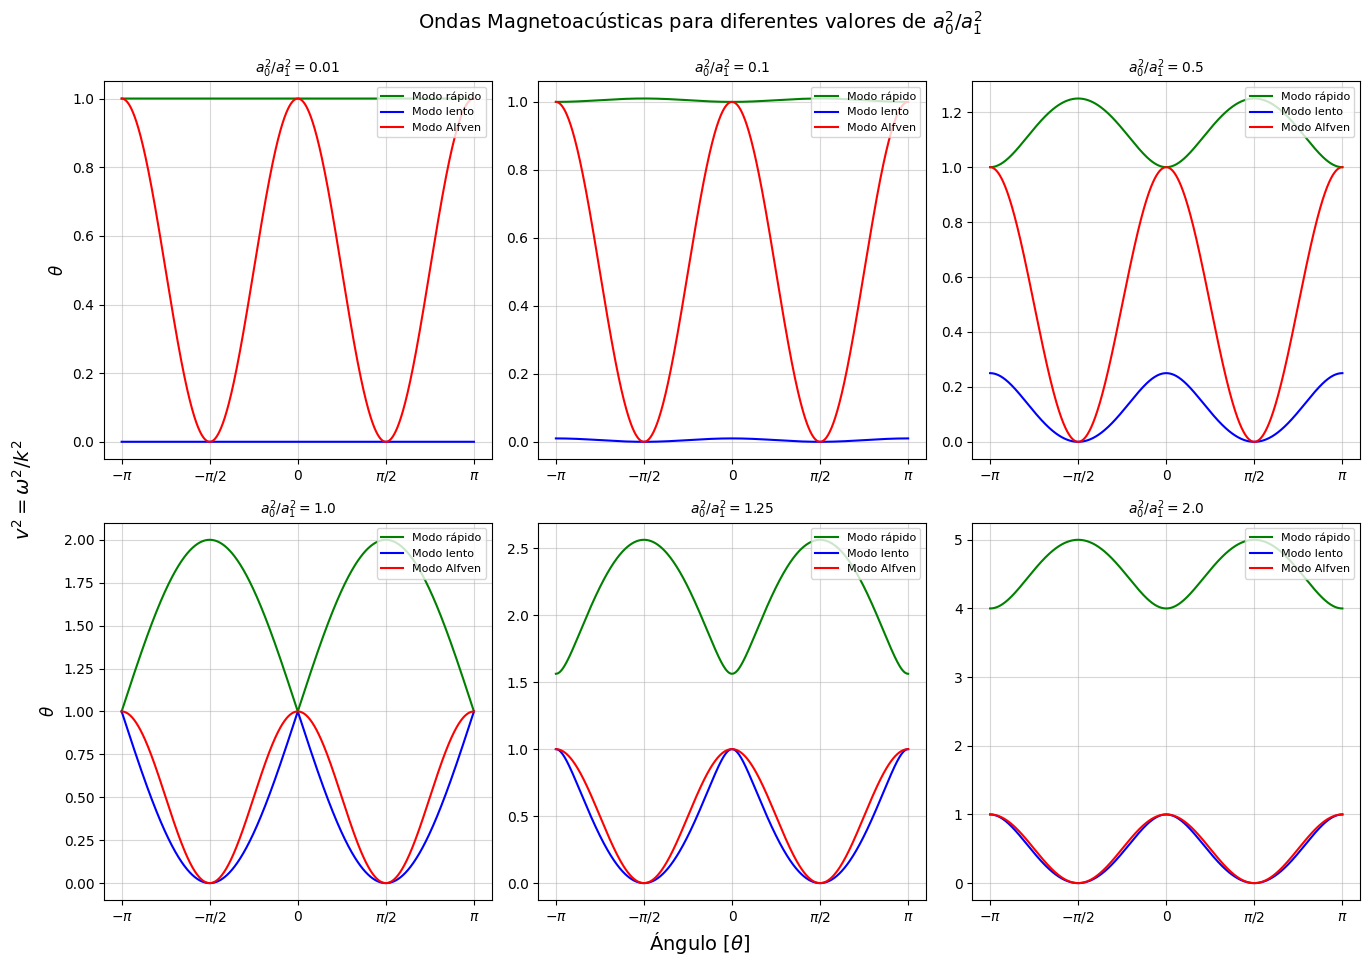

In [86]:
# Función para realizar el cálculo de las ondas magnetoacústicas

def ondas_magnetoacusticas(a1, a0, theta):
    discriminant = 1-4 * a1**2 *a0**2 /(a0**2+a1**2)**2 * (np.cos(theta))**2
    wf = 1/2 * (a0**2 + a1**2)*(1 + np.sqrt(discriminant))
    ws =  1/2 * (a0**2 + a1**2)*(1 - np.sqrt(discriminant))
    wa = a1**2 * np.cos(theta)**2
    return wf, ws, wa


# Función para graficar
def graph(ax, a1, a0, theta):
    wf, ws, wa = ondas_magnetoacusticas(a1, a0, theta)
    ax.plot(theta, wf, 'g', label='Modo rápido')
    ax.plot(theta, ws, 'b', label='Modo lento')
    ax.plot(theta, wa, 'r', label='Modo Alfven')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid('--', alpha=0.5)
    name = a0 / a1
    ax.set_title(f'$a_0^2 / a_1^2 = {name}$', fontsize=10)
    #Ponemos los ticks de pi en el eje x
    ax.set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
    ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])

# Creamos un plot con subplots para diferentes valores de a0/a1
list_ratios = [0.01**2, 0.1**2, 0.5**2, 1**2, (5/4)**2, 2**2]
a_1_values = [1] * len(list_ratios)  # Todos los a1 son 1
a_0_values = [np.sqrt(a_1_values[i]**2 * list_ratios[i]) for i in range(len(list_ratios))]
theta = np.linspace(-np.pi, np.pi, 1000)

# Configuración de la figura
rows, cols = 2, 3  # Ajustamos a 2 filas y 3 columnas
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    graph(ax, a_1_values[i], a_0_values[i], theta)
    if i % cols == 0:  # Agregar ylabel a la primera columna
        ax.set_ylabel(r'$\theta$', fontsize=12)

# Ajustes generales
fig.suptitle('Ondas Magnetoacústicas para diferentes valores de $a_0^2 / a_1^2$', fontsize=14)
fig.text(0.5, 0.04, r'Ángulo [$\theta$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, r'$v^2= \omega^2/k^2$', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.99])
plt.show()

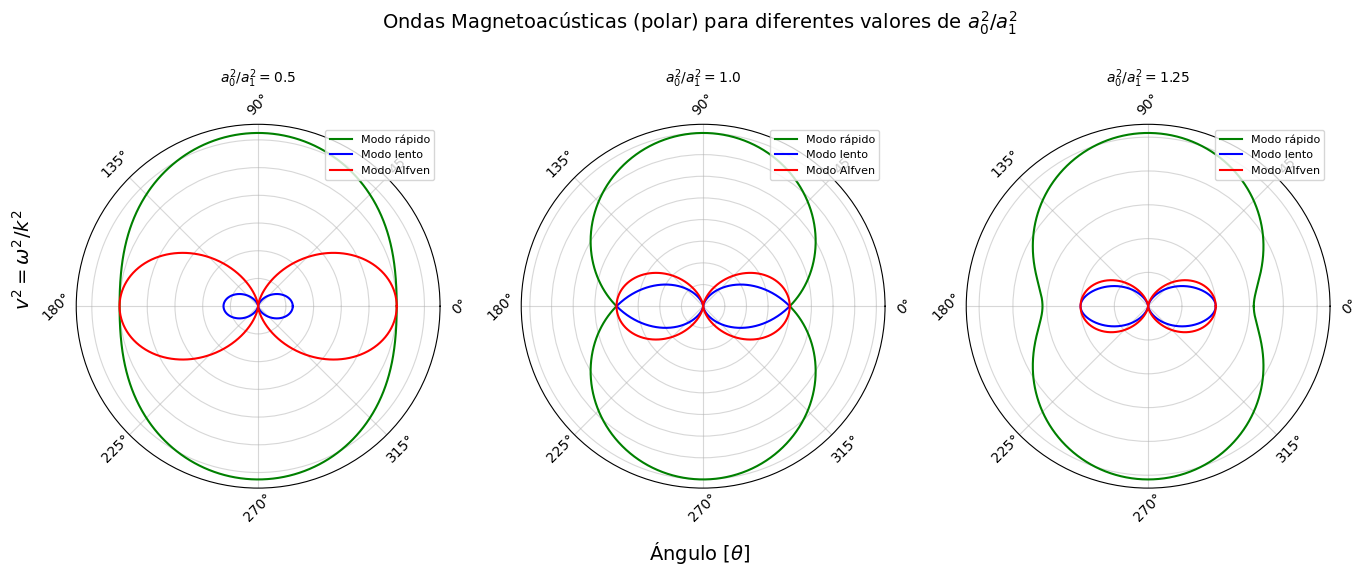

In [119]:
#Hacemos lo mismo pero ahora en coordenadas polares
# Configuración de la figura
rows, cols = 2, 3  # Ajustamos a 2 filas y 3 columnas
# fig, axs = plt.subplots(rows, cols, figsize=(15, 10), subplot_kw={'projection': 'polar'})
theta2 = np.linspace(0, 2 * np.pi, 1000)

def polar_graph(ax, a1, a0, theta):
    wf, ws, wa = ondas_magnetoacusticas(a1, a0, theta)
    ax.plot(theta, wf, 'g', label='Modo rápido')
    ax.plot(theta, ws, 'b', label='Modo lento')
    ax.plot(theta, wa, 'r', label='Modo Alfven')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid('--', alpha=0.5)
    name = a0 / a1
    ax.set_title(f'$a_0^2 / a_1^2 = {name}$', fontsize=10)
    #Ponemos los ticks de pi en el eje x
    #ax.set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
    #ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
    ax.xaxis.set_tick_params(rotation=45)
    #Borrar los labels del eje y
    ax.set_yticklabels([])

# Creamos un plot con subplots para diferentes valores de a0/a1
list_ratios = [ 0.5**2, 1**2, (5/4)**2]
a_1_values = [1] * len(list_ratios)  # Todos los a1 son 1
a_0_values = [np.sqrt(a_1_values[i]**2 * list_ratios[i]) for i in range(len(list_ratios))]
# Configuración de la figura
rows, cols = 1, 3  # Ajustamos a 2 filas y 3 columnas
fig, axs = plt.subplots(rows, cols, figsize=(15, 10), subplot_kw={'projection': 'polar'})

for i, ax in enumerate(axs.flat):
    polar_graph(ax, a_1_values[i], a_0_values[i], theta2)
    # if i % cols == 0:  # Agregar ylabel a la primera columna
        # ax.set_ylabel(r'$\theta$', fontsize=12)
# Ajustes generales
fig.suptitle('Ondas Magnetoacústicas (polar) para diferentes valores de $a_0^2 / a_1^2$', fontsize=14, y=0.75)
fig.text(0.5, 0.2, r'Ángulo [$\theta$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, r'$v^2= \omega^2/k^2$', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.90])
plt.show()


